In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("../Data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD()
svd_xtrain=svd.fit_transform(xtrain)
svd_xtest=svd.fit_transform(xtest)

In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



<AxesSubplot:>

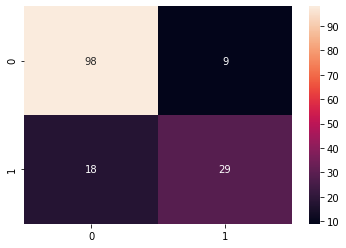

In [14]:
#Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is ",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [22]:
comps=list(range(2,8))
for i in comps:
    model=Pipeline([('svd',TruncatedSVD(n_components=i)),('lr',LogisticRegression())])
    model_fit=model.fit(xtrain,ytrain)
    ypred=model_fit.predict(xtest)
    print("with components {}, Accuracy is {} ".format(i,accuracy_score(ytest,ypred)))

with components 2, Accuracy is 0.7727272727272727 
with components 3, Accuracy is 0.7532467532467533 
with components 4, Accuracy is 0.7402597402597403 
with components 5, Accuracy is 0.7597402597402597 
with components 6, Accuracy is 0.7987012987012987 
with components 7, Accuracy is 0.8116883116883117 
